In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("bike_sharing_data.csv")

In [4]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dataset.shape

(730, 16)

In [6]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
dataset.loc[(dataset['season']==1),'season']='spring'
dataset.loc[(dataset['season']==2),'season']='summer'
dataset.loc[(dataset['season']==3),'season']='fall'
dataset.loc[(dataset['season']==4),'season']='winter'

In [10]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
def object_map_mnths(x):
    return x.map({1: 'jan' , 2: 'feb' , 3: 'Mar' , 4: 'Apr' , 5:'May', 6:'jun', 7: 'jul', 8: 'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [13]:
dataset[['mnth']]=dataset[['mnth']].apply(object_map_mnths)

In [14]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Mar     62
May     62
Oct     62
jan     62
jul     62
Apr     60
Nov     60
Sept    60
jun     60
feb     56
Name: count, dtype: int64

In [15]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [16]:
def str_map_weekday(x):
    return x.map({1: 'Mon' , 2: 'Tues' , 3: 'Wed' , 4: 'Thurs' , 5:'Fri', 6:'Sat', 0:'Sun'})

In [17]:
dataset[['weekday']]=dataset[['weekday']].apply(str_map_weekday)

In [18]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: count, dtype: int64

In [19]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [20]:
dataset.loc[(dataset['weathersit']==1),'weathersit']='A'
dataset.loc[(dataset['weathersit']==1),'weathersit']='B'
dataset.loc[(dataset['weathersit']==1),'weathersit']='C'

In [21]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
2    246
3     21
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='temp', ylabel='Density'>

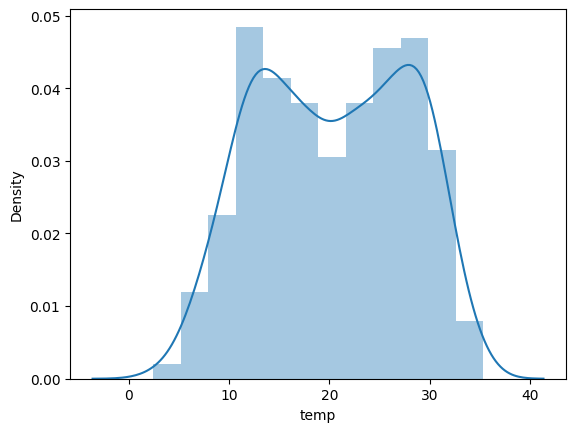

In [27]:
sns.distplot(dataset['temp'])

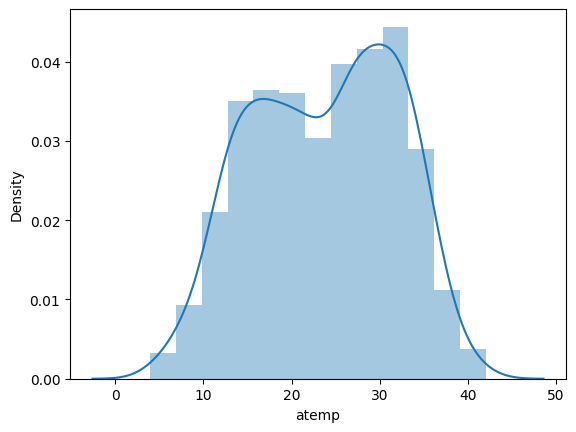

In [28]:
sns.distplot(dataset['atemp'])
plt.show()

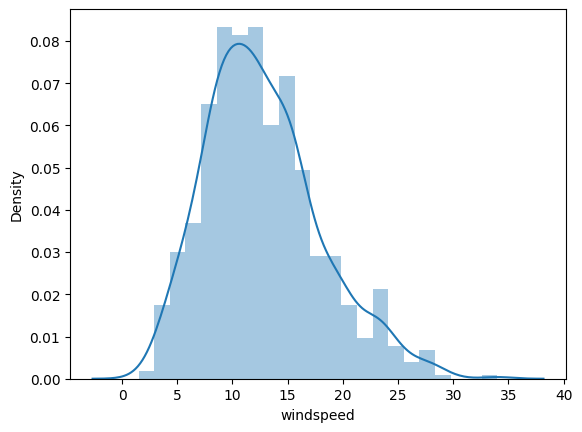

In [31]:
sns.distplot(dataset['windspeed'])
plt.show()

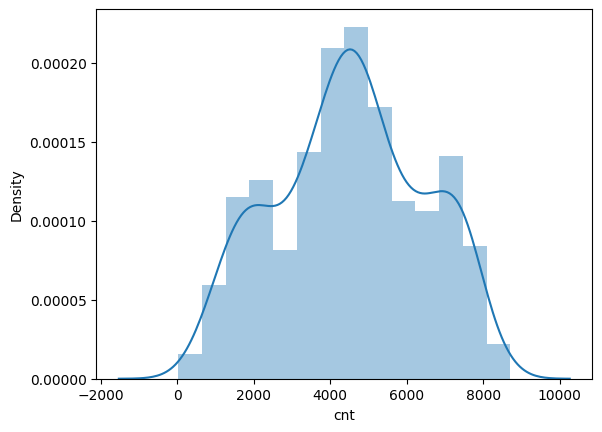

In [32]:
sns.distplot(dataset['cnt'])
plt.show()

In [40]:
dataset['dteday']= dataset['dteday'].astype('datetime64[ns]')

In [45]:
dataset_categorical=dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [48]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [49]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,jan,Sat,2
1,spring,jan,Sun,2
2,spring,jan,Mon,A
3,spring,jan,Tues,A
4,spring,jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,2
726,spring,Dec,Fri,2
727,spring,Dec,Sat,2
728,spring,Dec,Sun,A


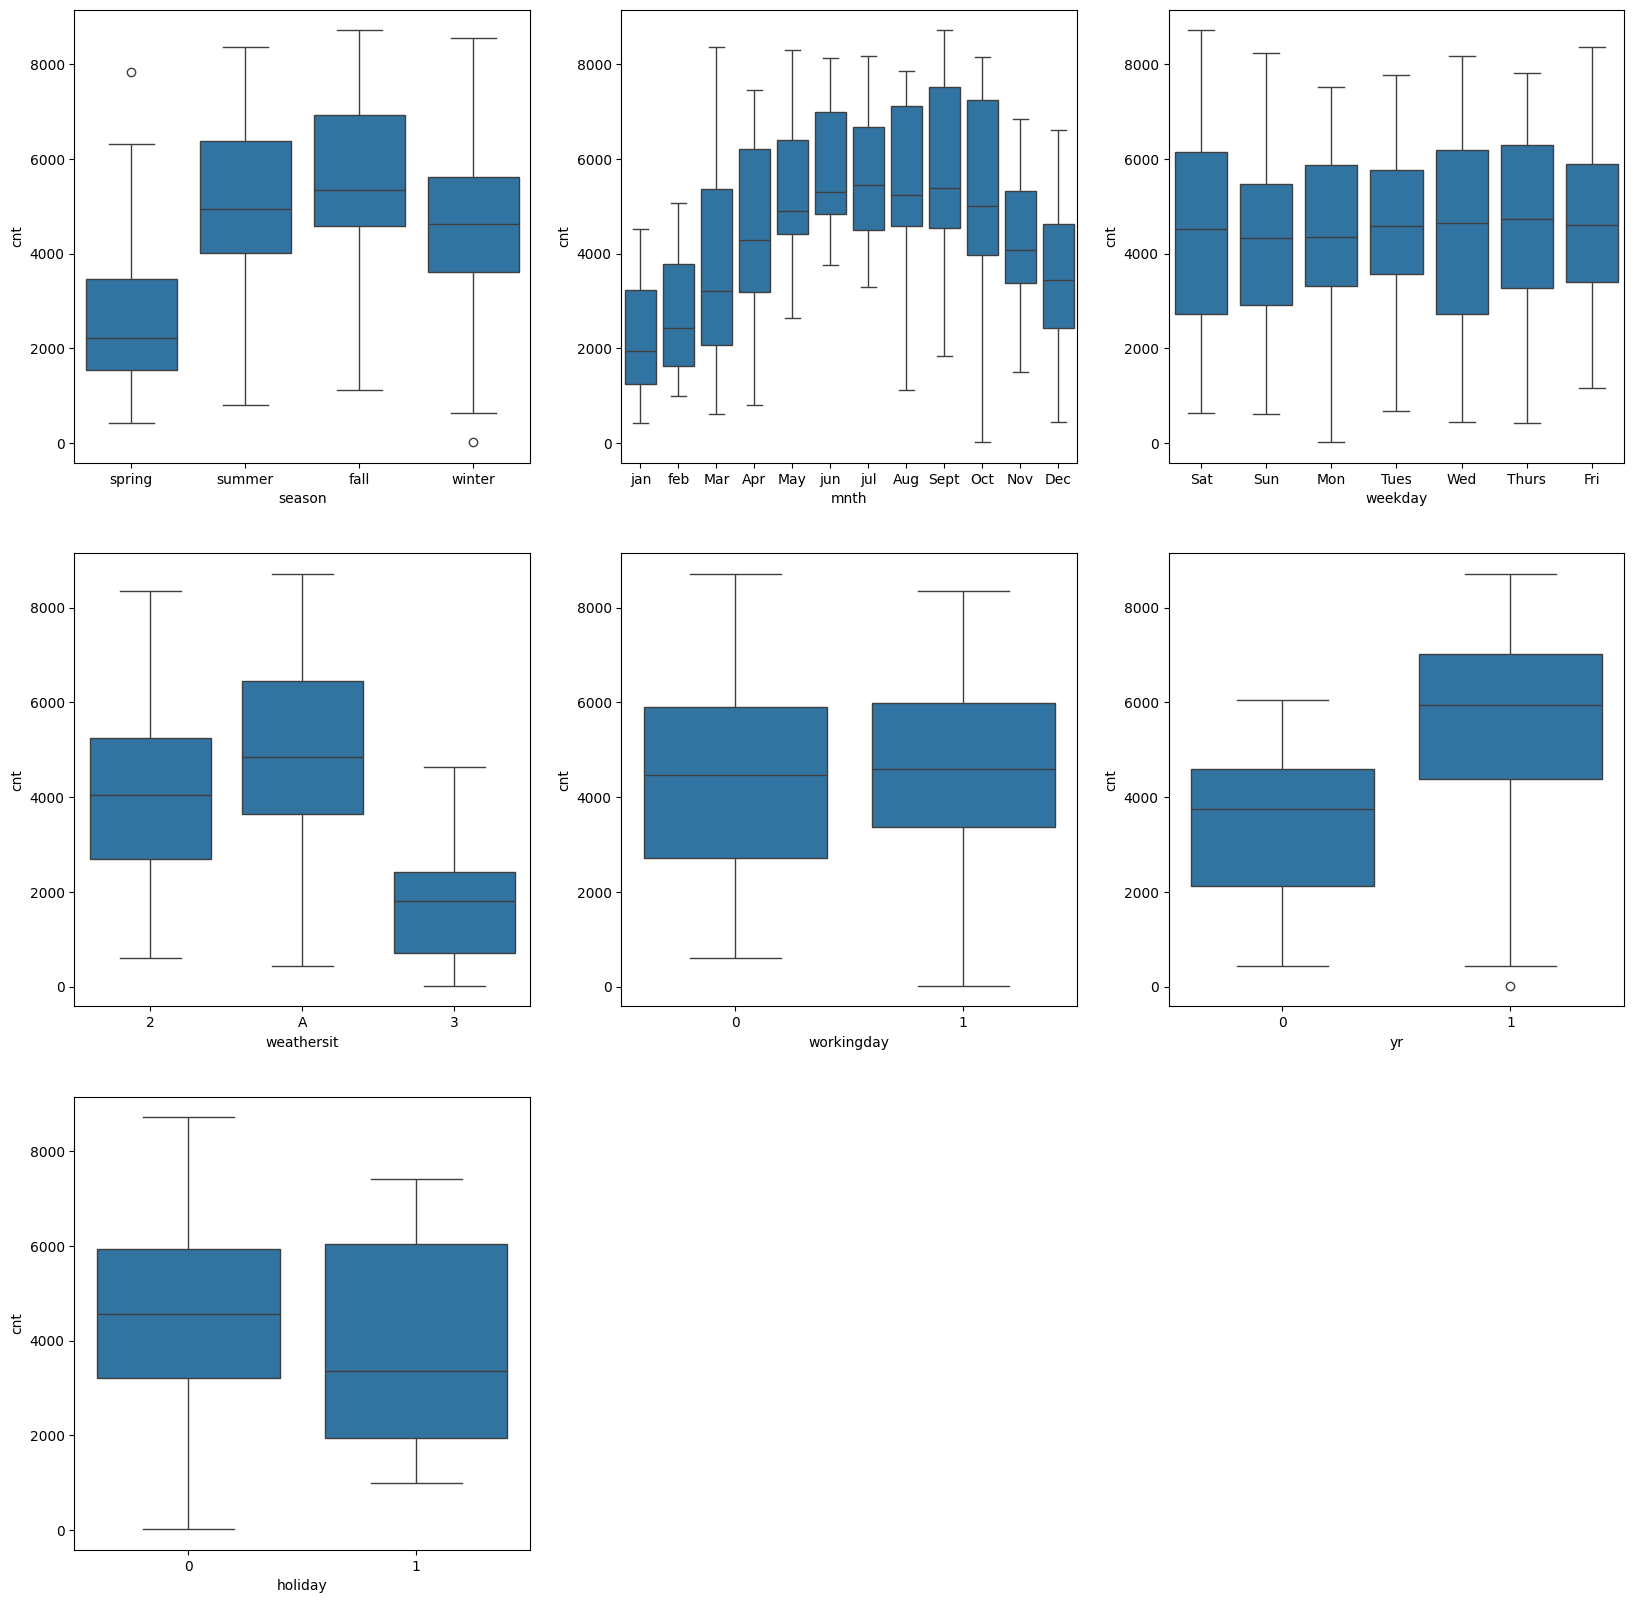

In [51]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=dataset)

plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=dataset)

plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=dataset)

plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=dataset)

plt.subplot(3, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=dataset)

plt.subplot(3, 3, 6)
sns.boxplot(x='yr', y='cnt', data=dataset)

plt.subplot(3, 3, 7)
sns.boxplot(x='holiday', y='cnt', data=dataset)

plt.show()


In [57]:
intVarlist= ["casual", "registered", "cnt"]

for var in intVarlist:
     dataset[var]=dataset[var].astype("float")

In [58]:
dataset_numeric=dataset.select_dtypes (include=['float64']) 
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


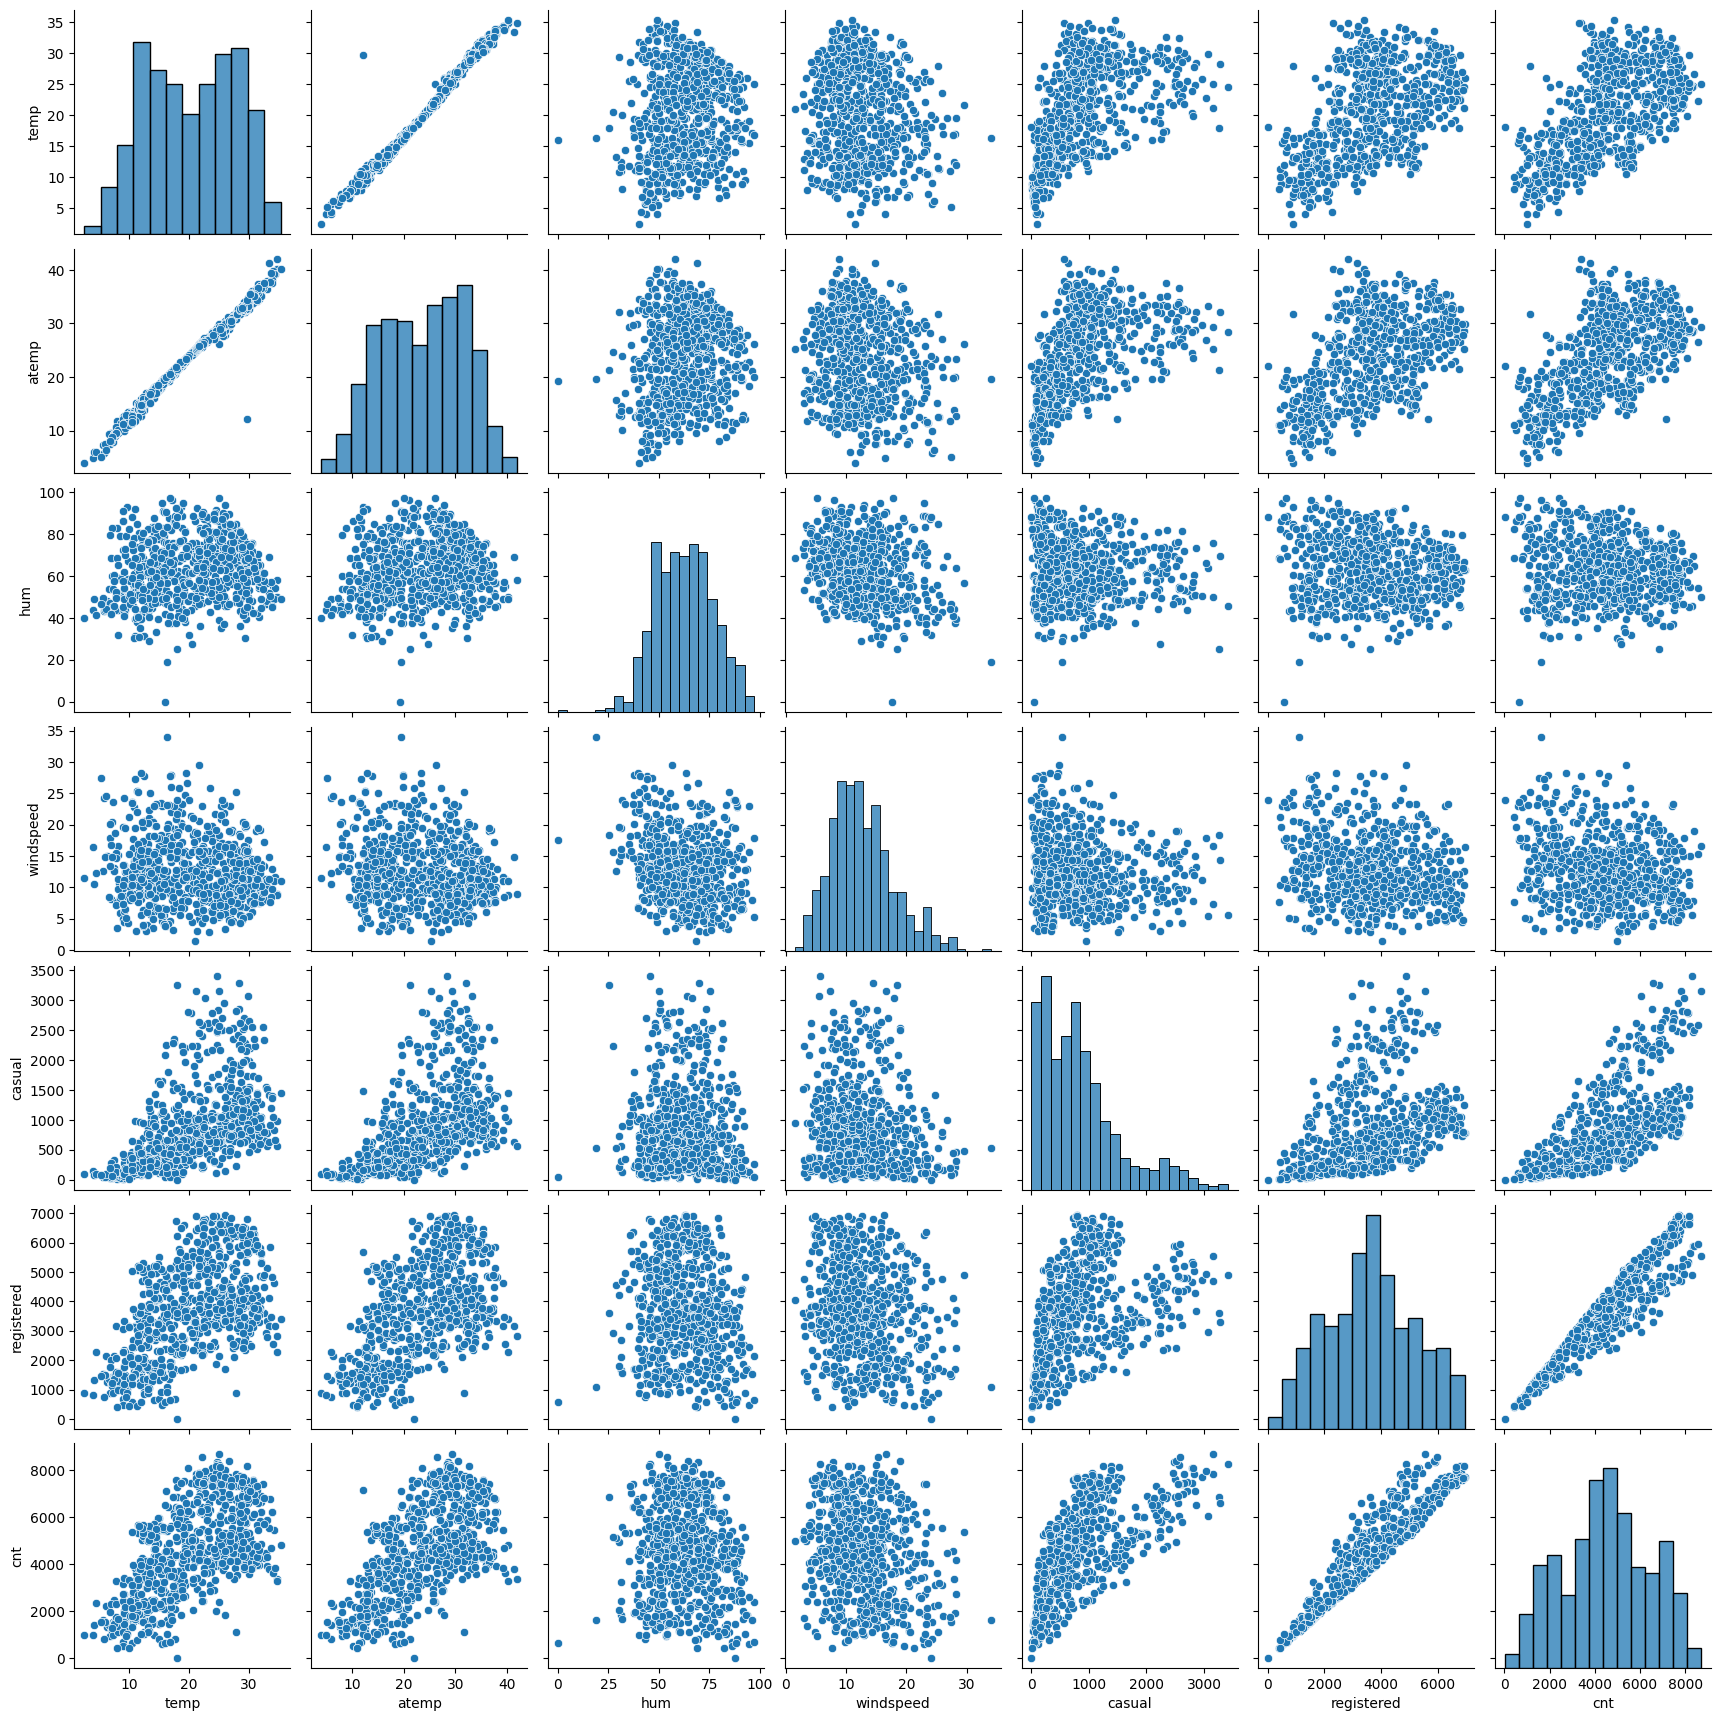

In [59]:
sns.pairplot(dataset_numeric)
plt.show()

In [66]:
cor=dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

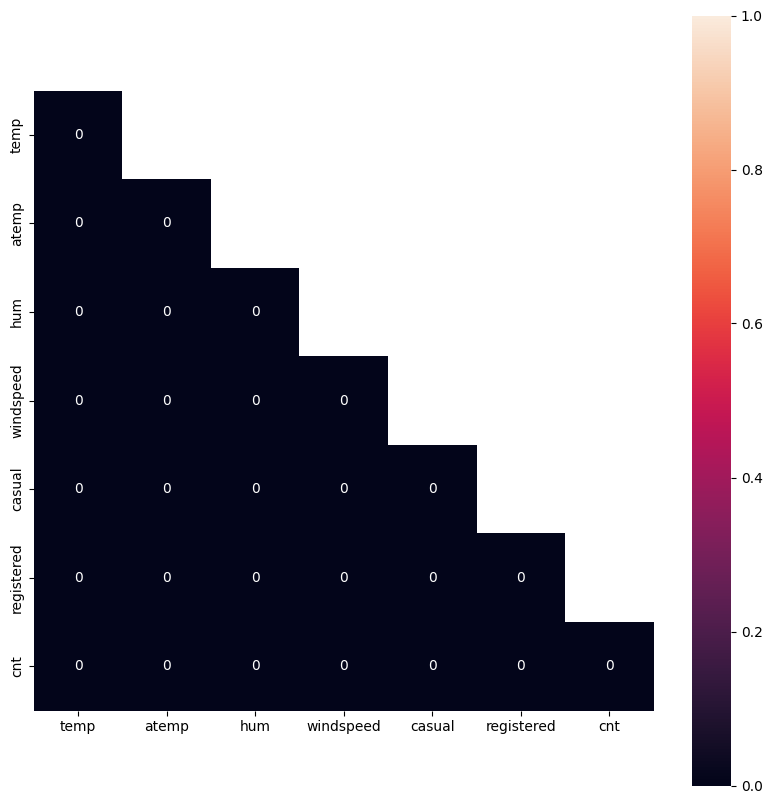

In [71]:
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig, ax=plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

In [72]:
dataset.drop('atemp',axis=1,inplace=True)

In [74]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,Sat,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,Sun,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,Dec,0,Thurs,1,2,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,spring,1,Dec,0,Fri,1,2,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,spring,1,Dec,0,Sat,0,2,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,spring,1,Dec,0,Sun,0,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [75]:
dataset_categorical=dataset.select_dtypes(include=['object'])

In [76]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,jan,Sat,2
1,spring,jan,Sun,2
2,spring,jan,Mon,A
3,spring,jan,Tues,A
4,spring,jan,Wed,A


In [77]:
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [78]:
dataset = dataset.drop(list(dataset_categorical.columns), axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [81]:
dataset=pd.concat([dataset,dataset_dummies],axis=1)

In [82]:
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,False,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,False,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,True
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,True
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,...,False,False,False,False,False,True,False,False,False,False
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,...,False,False,False,False,False,False,False,False,False,False
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,...,False,False,False,True,False,False,False,False,False,False
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,...,False,False,False,False,True,False,False,False,False,True


In [84]:
dataset=dataset.drop(['instant','dteday'], axis=1,inplace=False)

dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,False,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,False,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,True
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,True
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,True


In [86]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [88]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(dataset, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,False,False,False,False,False,False,True,False,False,True
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,True,False,False,False,False,False,True,False,False,True
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,False,True,False,False,False,False,False,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,True,False,False,False,False,True
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,True,True,False,False,False,False,False,False,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,False,True,False,False,False,True
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,True,False,True
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,True,False,False,False,False,False,False


In [90]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler=MinMaxScaler()

In [93]:
var=["temp", "hum", "windspeed", "casual", "registered", "cnt"]

df_train[var]=scaler.fit_transform(df_train[var])

In [94]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


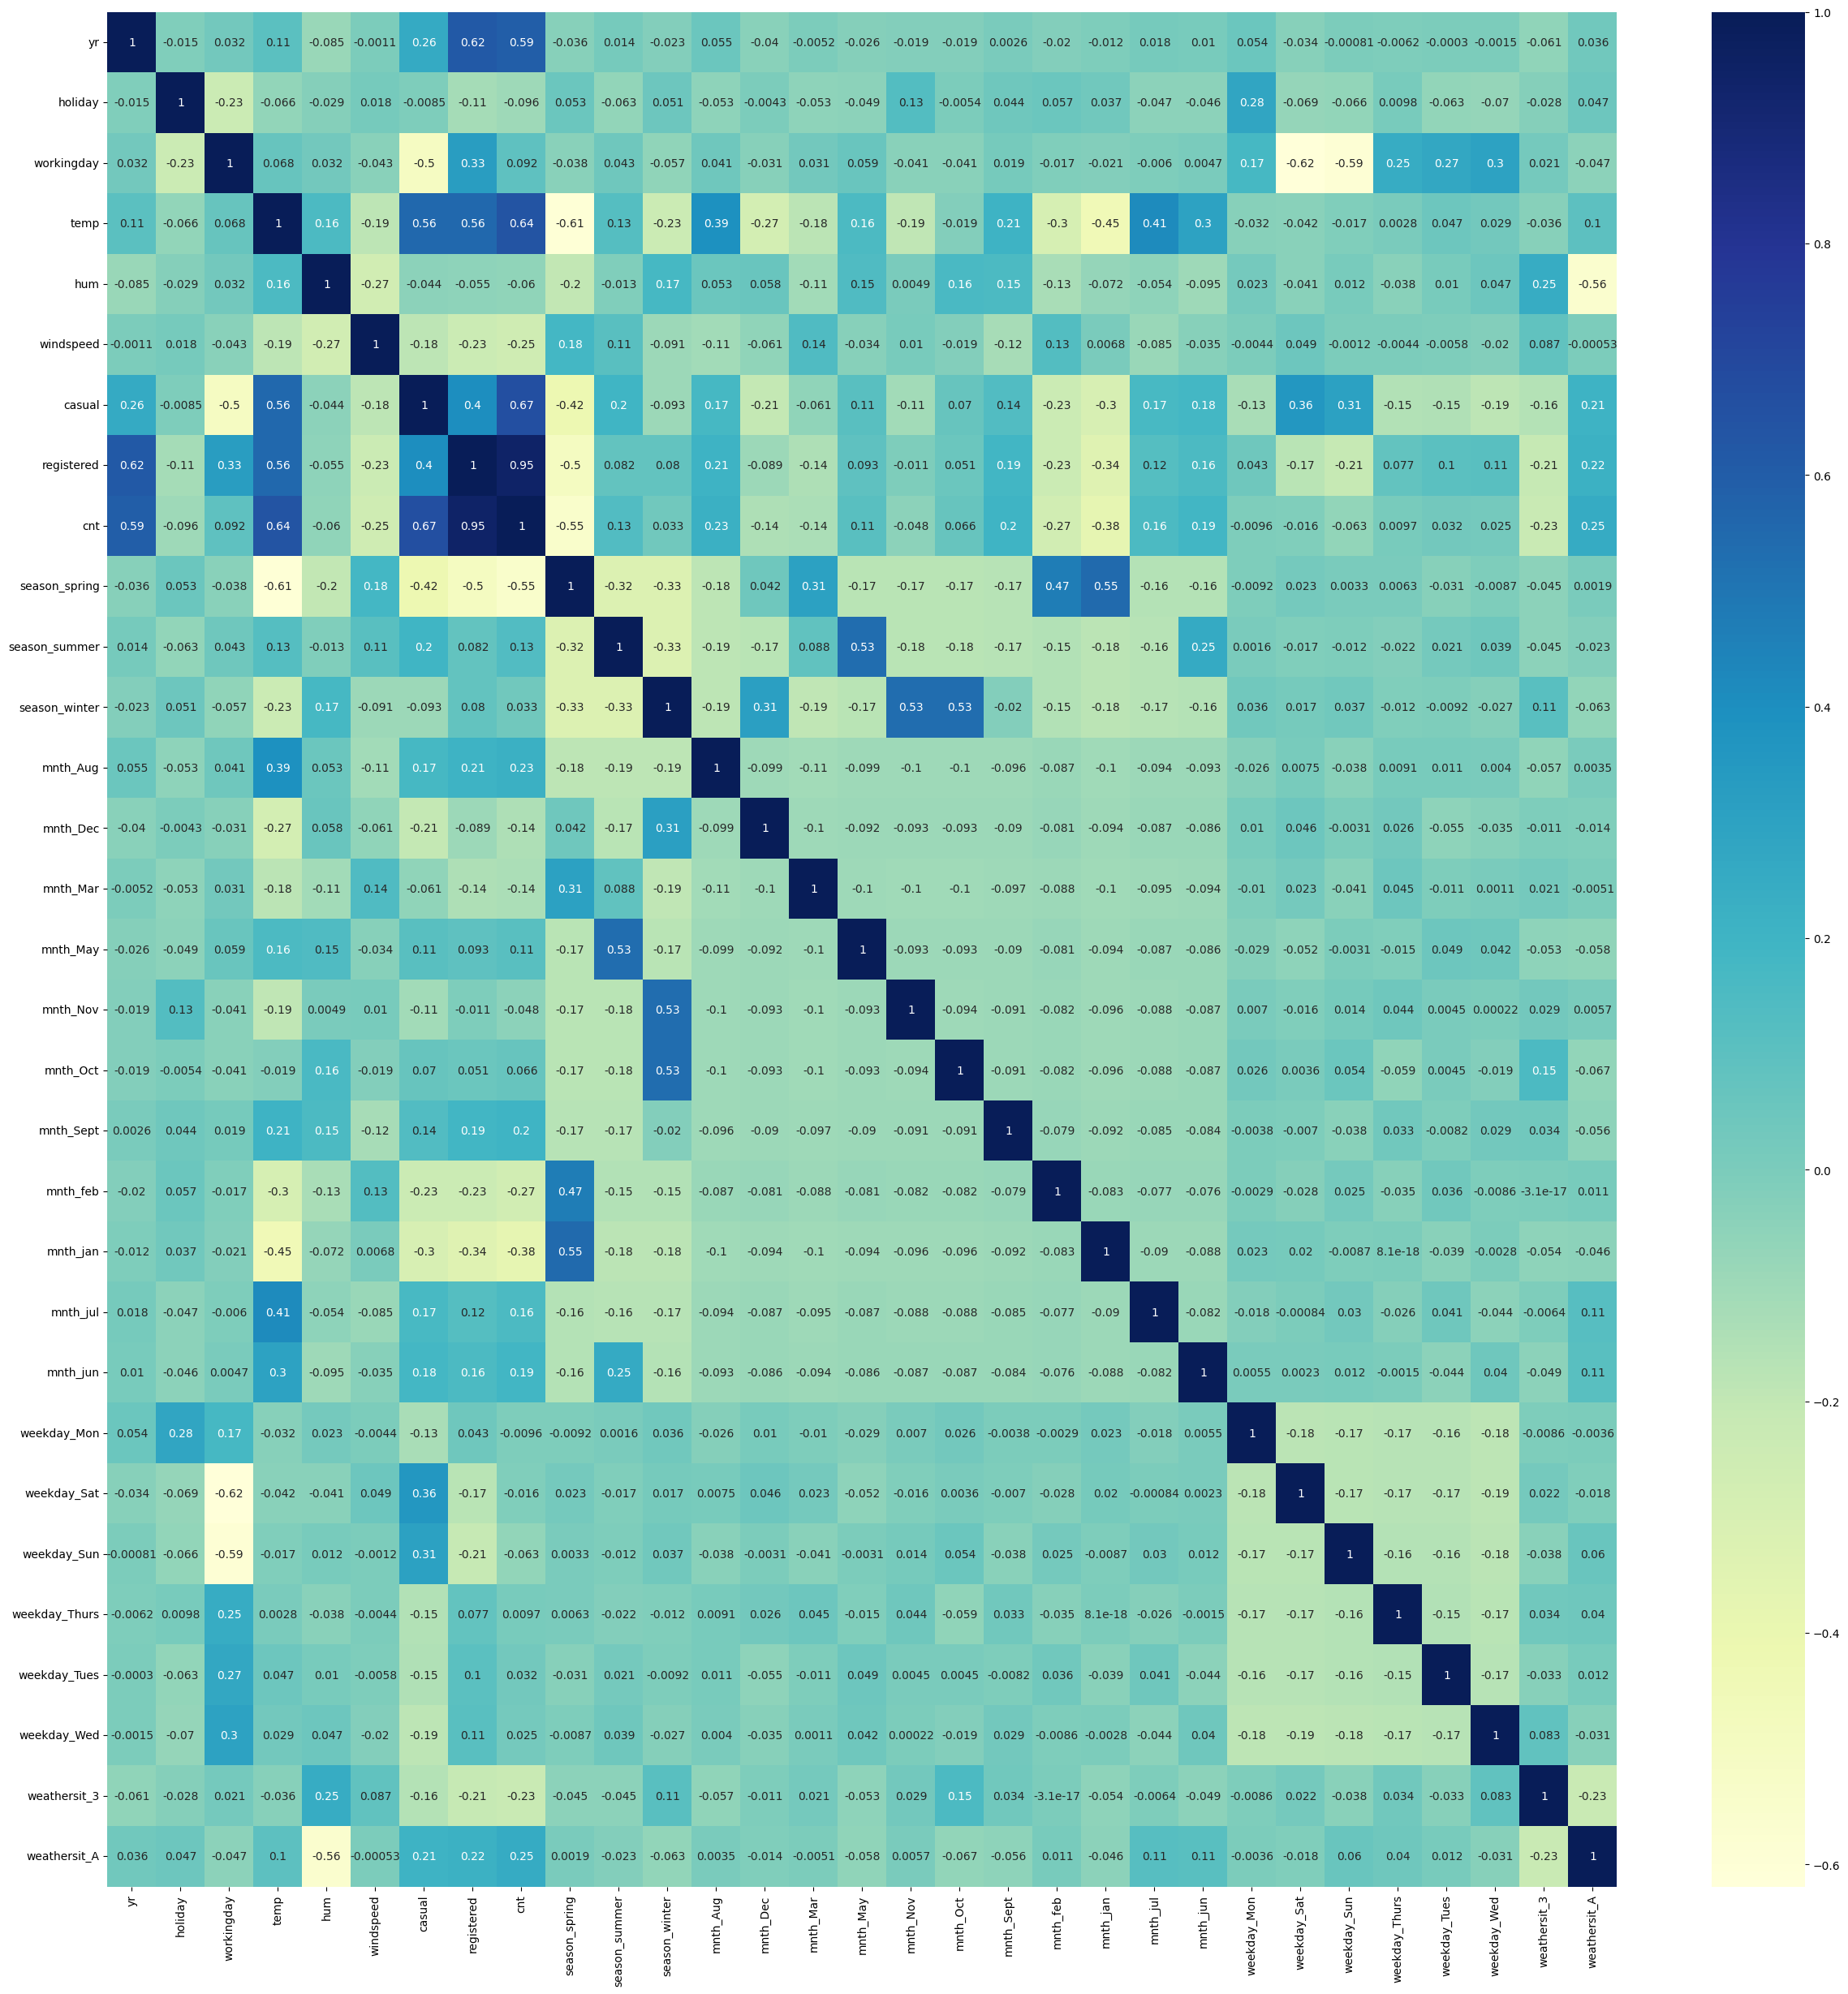

In [99]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")  # Also corrected colormap spelling
plt.show()

In [103]:
y_train=df_train.pop('cnt')
x_train=df_train.drop(["casual","registered"],axis=1)

In [104]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [126]:
np.array(x_train)

array([[1, 0, 1, ..., False, False, True],
       [1, 0, 1, ..., False, False, True],
       [1, 0, 0, ..., False, False, False],
       ...,
       [0, 0, 1, ..., True, False, True],
       [0, 0, 0, ..., False, False, False],
       [0, 0, 1, ..., False, False, False]], shape=(510, 28), dtype=object)

In [134]:
print(x_train.dtypes)

yr                 int64
holiday            int64
workingday         int64
temp             float64
hum              float64
windspeed        float64
season_spring       bool
season_summer       bool
season_winter       bool
mnth_Aug            bool
mnth_Dec            bool
mnth_Mar            bool
mnth_May            bool
mnth_Nov            bool
mnth_Oct            bool
mnth_Sept           bool
mnth_feb            bool
mnth_jan            bool
mnth_jul            bool
mnth_jun            bool
weekday_Mon         bool
weekday_Sat         bool
weekday_Sun         bool
weekday_Thurs       bool
weekday_Tues        bool
weekday_Wed         bool
weathersit_3        bool
weathersit_A        bool
dtype: object


In [135]:
import statsmodels.api as sm

In [146]:
x_train_clean=x_train.astype(float)
x_train_lm = sm.add_constant(x_train_clean)
lr = sm.OLS(y_train, x_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 03 May 2025   Prob (F-statistic):          8.74e-182
Time:                        21:47:06   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1962      0.037      5.257

In [138]:
x_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
653,1.0,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
576,1.0,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
426,1.0,1.0,0.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,1.0,0.0,0.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
482,1.0,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1.0,0.0,1.0,0.824514,0.605840,0.355596,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,1.0,1.0,0.0,1.0,0.863973,0.679690,0.187140,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
53,1.0,0.0,0.0,1.0,0.202618,0.435939,0.111379,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
350,1.0,0.0,0.0,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
lr.params

const            0.196231
yr               0.232116
holiday         -0.002254
workingday       0.084671
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
mnth_feb        -0.032282
mnth_jan        -0.062777
mnth_jul        -0.040350
mnth_jun        -0.002972
weekday_Mon     -0.020907
weekday_Sat      0.084175
weekday_Sun      0.029640
weekday_Thurs   -0.009237
weekday_Tues    -0.018890
weekday_Wed     -0.005388
weathersit_3    -0.196376
weathersit_A     0.061066
dtype: float64

In [141]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [142]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859   0.00104515
  0.02393995 -0.04185131  0.00753359  0.0810599  -0.03228181 -0.06277659
 -0.04035007 -0.00297239 -0.02090673  0.03511753 -0.01941807 -0.00923674
 -0.01888985 -0.00538751 -0.19637639  0.0610664 ]
0.24528923142429132


In [149]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 03 May 2025   Prob (F-statistic):          8.74e-182
Time:                        21:47:26   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1962      0.037      5.257      0.000       0.123       0.270
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday          -0.0023      0.024     -0.093      0.926      -0.050       0.045
workingday        0.0847      0.012      6.774      0.000       0.060       0.109
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
mnth_feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0842      0.014      5.999      0.000       0.057       0.112
weekday_Sun       0.0296      0.014      2.058      0.040       0.001       0.058
weekday_Thurs    -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tues     -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_3     -0.1964      0.025     -7.869      0.000      -0.245      -0.147
weathersit_A      0.0611      0.010      5.854      0.000       0.041       0.082
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     4.60e+15
================================================================

In [151]:
from sklearn.feature_selection import RFE

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)


[ True  True  True  True  True  True  True  True  True False False False
 False False False  True False  True  True False False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3 14  5  2 10  1  4  1  1 13  8  1  7 11
  9 12  1  1]


In [160]:
col1=  x_train.columns[rfe1.support_]

In [161]:
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Sept',
       'mnth_jan', 'mnth_jul', 'weekday_Sat', 'weathersit_3', 'weathersit_A'],
      dtype='object')

In [185]:
import statsmodels.api as sm
x_train_ref1 = x_train[col1]
x_train_ref1 = x_train_ref1.astype(float)
x_train_ref1 = sm.add_constant(x_train_ref1)
lm1 = sm.OLS(y_train, x_train_ref1).fit()

In [186]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 03 May 2025   Prob (F-statistic):          2.31e-191
Time:                        22:28:03   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1932      0.040      4.874      0.000       0.115       0.271
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Sept         0.0812      0.016      4.934      0.000       0.049       0.114
mnth_jan         -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul         -0.0532      0.018     -2.947      0.003      -0.089      -0.018
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_3     -0.1910      0.025     -7.750      0.000      -0.239      -0.143
weathersit_A      0.0578      0.010      5.574      0.000       0.037       0.078
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
a = x_train_ref1.drop('const', axis=1)

In [189]:
vif=pd. DataFrame()
vif['features'] = a.columns
vif['VIF']=[variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
4,hum,24.60
3,temp,20.45
2,workingday,5.32
6,season_spring,5.06
5,windspeed,4.71
8,season_winter,3.84
14,weathersit_A,3.47
7,season_summer,2.98
0,yr,2.09
12,weekday_Sat,1.98


In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)

rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)


[ True False False  True  True  True  True False False False False False
 False False False False False False  True False False False False False
 False False  True False]
[ 1  2  8  1  1  1  1  6  3 14 11 22 13 10 18  4 12  9  1 21 16  7 15 19
 17 20  1  5]


In [191]:
col2=  x_train.columns[rfe2.support_]

In [192]:
import statsmodels.api as sm
x_train_ref2 = x_train[col1]
x_train_ref2 = x_train_ref2.astype(float)
x_train_ref2 = sm.add_constant(x_train_ref1)
lm2 = sm.OLS(y_train, x_train_ref2).fit()

In [193]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 03 May 2025   Prob (F-statistic):          2.31e-191
Time:                        22:28:13   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1932      0.040      4.874      0.000       0.115       0.271
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Sept         0.0812      0.016      4.934      0.000       0.049       0.114
mnth_jan         -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul         -0.0532      0.018     -2.947      0.003      -0.089      -0.018
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_3     -0.1910      0.025     -7.750      0.000      -0.239      -0.143
weathersit_A      0.0578      0.010      5.574      0.000       0.037       0.078
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
b = x_train_ref2.drop('const', axis=1)

In [195]:
vif1=pd. DataFrame()
vif1['features'] = b.columns
vif1['VIF']=[variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF']= round(vif1['VIF'], 2)
vif1=vif1.sort_values(by="VIF",ascending=False)
vif1

,features,VIF
4,hum,24.60
3,temp,20.45
2,workingday,5.32
6,season_spring,5.06
5,windspeed,4.71
8,season_winter,3.84
14,weathersit_A,3.47
7,season_summer,2.98
0,yr,2.09
12,weekday_Sat,1.98


In [197]:
y_train_cnt = lm2.predict(x_train_ref2)

<Axes: xlabel='cnt', ylabel='Density'>

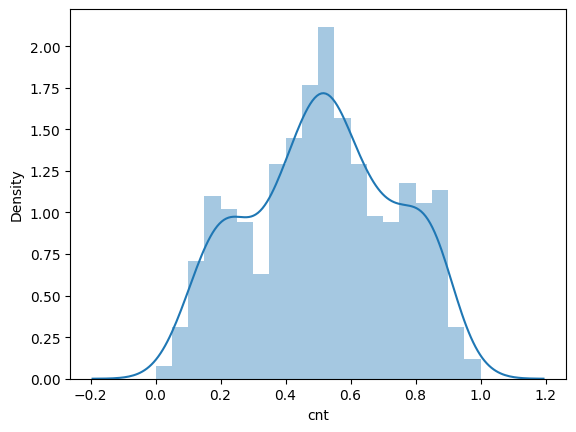

In [201]:
fig = plt.figure()
sns.distplot(y_train, bins=20)


In [202]:
df_test[var] = scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,False,...,True,False,True,False,False,False,False,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,False,...,False,True,False,False,False,False,False,True,False,True
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,False,...,False,False,False,False,False,True,False,False,False,False
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,False,...,False,False,False,False,False,False,False,True,False,True
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,True,...,False,False,False,False,True,False,False,False,False,False
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,False,...,False,False,False,False,False,False,True,False,False,True
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,False,...,False,False,False,False,True,False,False,False,False,True
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,False,...,False,False,False,False,False,False,False,True,False,False


In [203]:
y_test=df_test.pop('cnt')
x_test=df_test.drop(["casual","registered"],axis=1)

In [204]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_jul,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_3,weathersit_A
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
299,0,0,1,0.511964,0.837699,0.334206,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
221,0,0,1,0.881625,0.437098,0.339570,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
152,0,0,1,0.817246,0.314298,0.537414,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [206]:
c = x_train_ref2.drop('const', axis=1)

In [207]:
col2 = c.columns

In [208]:
x_test_ref2 = x_test[col2]

In [209]:
x_test_ref2 = sm.add_constant(x_test_ref2)

In [210]:
x_test_ref2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   workingday     219 non-null    int64  
 4   temp           219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   season_spring  219 non-null    bool   
 8   season_summer  219 non-null    bool   
 9   season_winter  219 non-null    bool   
 10  mnth_Sept      219 non-null    bool   
 11  mnth_jan       219 non-null    bool   
 12  mnth_jul       219 non-null    bool   
 13  weekday_Sat    219 non-null    bool   
 14  weathersit_3   219 non-null    bool   
 15  weathersit_A   219 non-null    bool   
dtypes: bool(9), float64(4), int64(3)
memory usage: 15.6 KB


In [211]:
y_pred = lm2.predict(x_test_ref2)

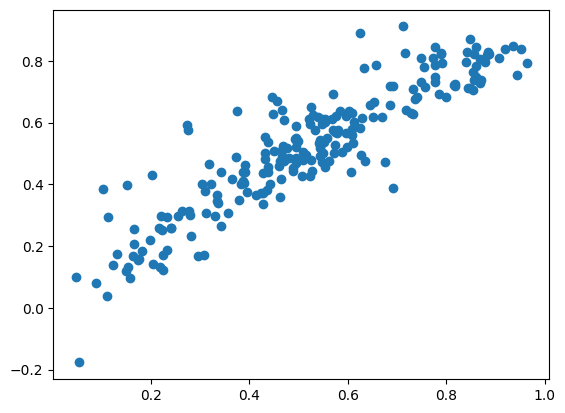

In [212]:
plt.figure()
plt.scatter(y_test, y_pred)

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.814323726851943

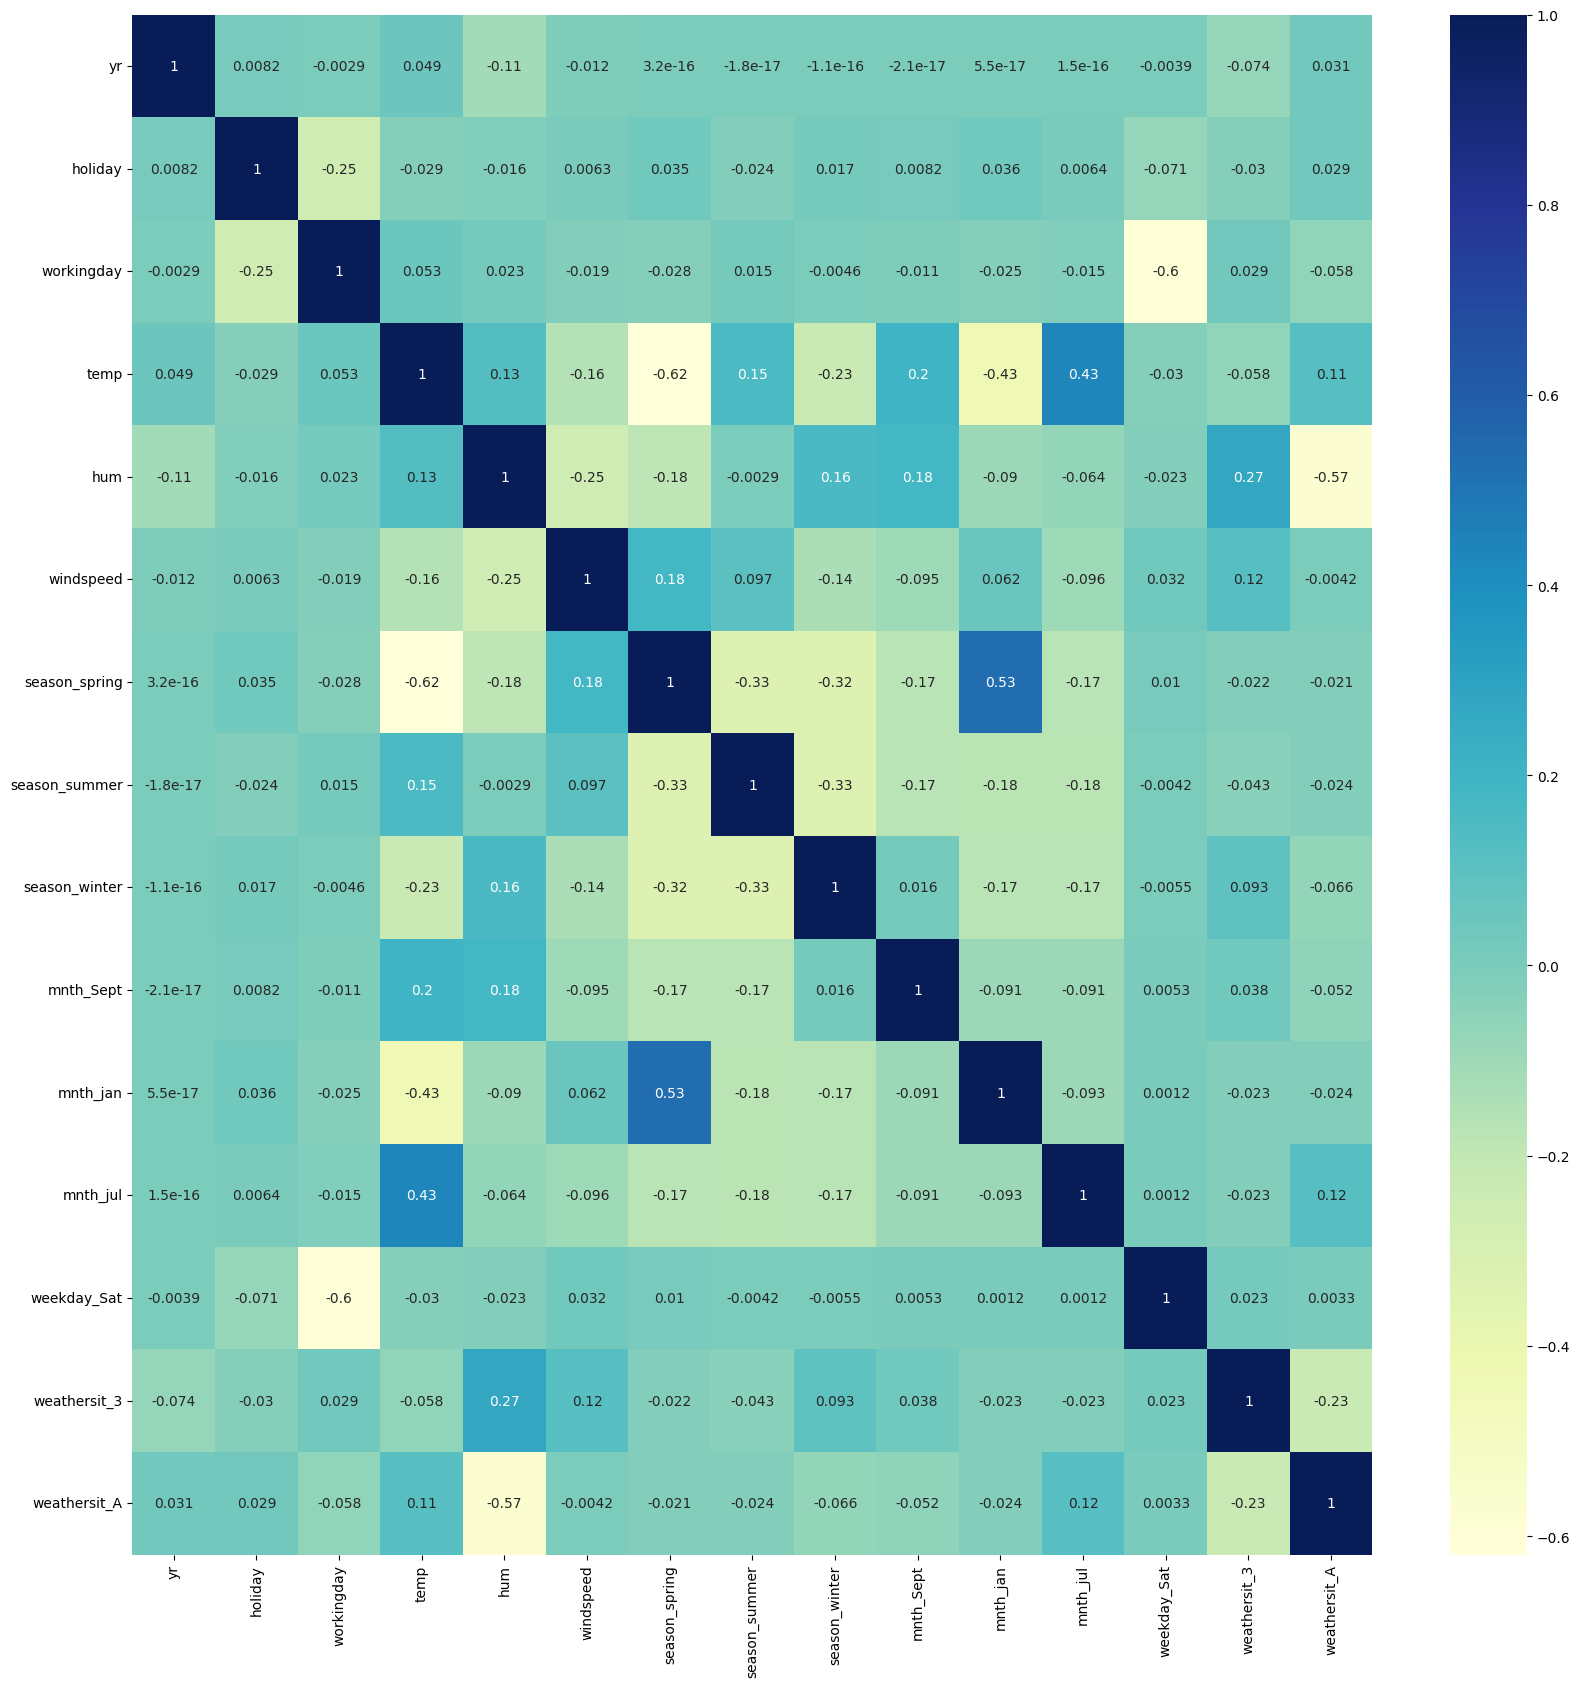

In [218]:
plt.figure(figsize=(20,20))

sns.heatmap(dataset[col2].corr(), cmap= "YlGnBu", annot=True)
plt.show()